In [104]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical




# Load the dataset from the local file
data = np.load('cifar10.npz')
train_images = images.transpose(0, 2, 3, 1)
train_images_normalized = train_images / 255.0

In [105]:
images = data['raw']  # Raw image data
labels = data['labels']  # Labels for the dataset

unique_labels = np.unique(labels)
print(unique_labels)

[0 1 2 3 4 5 6 7 8 9]


In [106]:
# 3. Build a CNN model using TensorFlow/Keras
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer for 10 classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


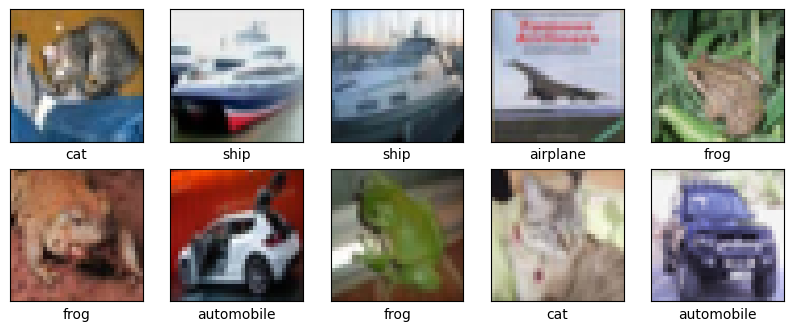

In [107]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# Visualize a few training images with their class labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])  # Display image
    plt.xlabel(class_names[labels[i]])  # Use the label directly
plt.show()

In [108]:
x_train, x_val, y_train, y_val = train_test_split(train_images_normalized, labels, test_size=0.2, random_state=42)

In [109]:
# 6. Train the model
history = model.fit(x_train, y_train, epochs=10,  validation_data=(x_val, y_val))


Epoch 1/10
25/25 [==============================] - 2s 25ms/step - loss: 2.2936 - accuracy: 0.1350 - val_loss: 2.2209 - val_accuracy: 0.2150
Epoch 2/10
25/25 [==============================] - 0s 18ms/step - loss: 2.1412 - accuracy: 0.2125 - val_loss: 2.0825 - val_accuracy: 0.2200
Epoch 3/10
25/25 [==============================] - 0s 17ms/step - loss: 2.0029 - accuracy: 0.2537 - val_loss: 2.0519 - val_accuracy: 0.2300
Epoch 4/10
25/25 [==============================] - 0s 20ms/step - loss: 1.9340 - accuracy: 0.2525 - val_loss: 1.8828 - val_accuracy: 0.3350
Epoch 5/10
25/25 [==============================] - 1s 20ms/step - loss: 1.8070 - accuracy: 0.3100 - val_loss: 1.7947 - val_accuracy: 0.3400
Epoch 6/10
25/25 [==============================] - 0s 17ms/step - loss: 1.7433 - accuracy: 0.3575 - val_loss: 1.8145 - val_accuracy: 0.3550
Epoch 7/10
25/25 [==============================] - 0s 15ms/step - loss: 1.6630 - accuracy: 0.4025 - val_loss: 1.6979 - val_accuracy: 0.3500
Epoch 8/10
25

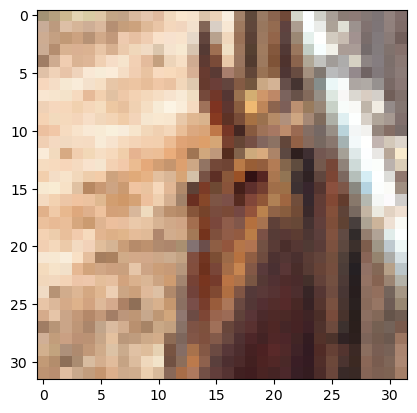

7/7 [==============================] - 0s 6ms/step
dog


In [110]:
import random
n = random.randint(0,199)
plt.imshow(x_val[n])
plt.show()

predicted_value=model.predict(x_val)
ans  = np.argmax(predicted_value[n])
print(class_names[ans])

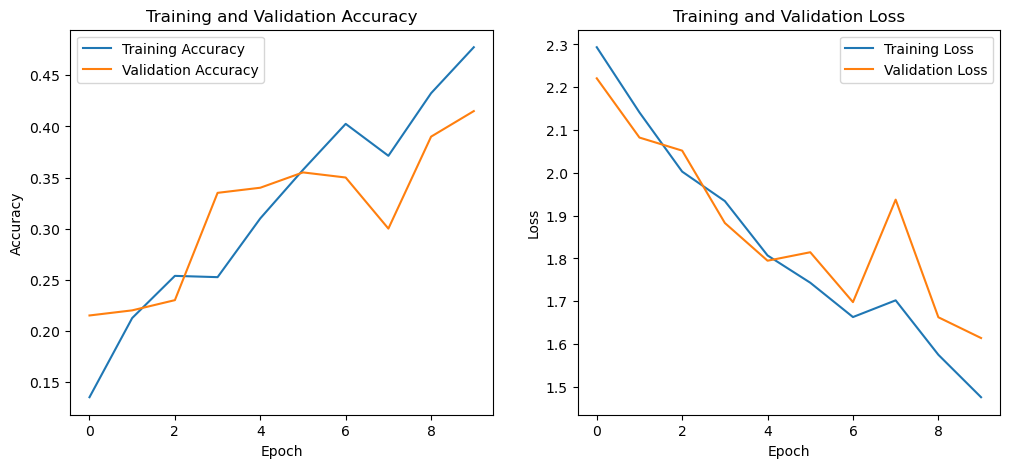

In [111]:

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.show()
